Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

In [94]:
df = pd.read_csv('portfolios.csv')
df_simple = pd.DataFrame()

Normalizando Valores

In [95]:
df['SMA42'] = MinMaxScaler().fit_transform(df[['SMA42']])
df['SMA150'] = MinMaxScaler().fit_transform(df[['SMA150']])
df['RSI'] = MinMaxScaler().fit_transform(df[['RSI']])
df['VAR'] = MinMaxScaler().fit_transform(df[['VAR']])
df_simple['RETURN'] = (df['SMA42'] + df['SMA150'] + df['RSI'])
df_simple['RISK'] = df['VAR']
df_simple['RETURN'] = MinMaxScaler().fit_transform(df_simple[['RETURN']])

In [96]:
df_simple.describe()


,RETURN,RISK
count,90.000000,90.000000
mean,0.452616,0.336131
std,0.170899,0.188523
min,0.000000,0.000000
25%,0.366863,0.227833
50%,0.448264,0.310992
75%,0.515970,0.459239
max,1.000000,1.000000


Tratando Outliers

In [97]:
clf = LocalOutlierFactor(n_neighbors=10)
scores = clf.fit_predict(df_simple)
df_simple['outlier'] = scores
df['outlier'] = scores

In [98]:
df_simple[df_simple['outlier'] == -1]

,RETURN,RISK,outlier
0,0.170403,0.564886,-1
3,0.129649,0.286562,-1
14,0.666743,0.276348,-1
17,0.892769,0.738400,-1
23,0.654580,0.254593,-1
46,0.000000,0.000000,-1
49,0.408660,1.000000,-1
54,0.923015,0.560024,-1
74,1.000000,0.430227,-1
84,0.457102,0.862398,-1


In [99]:
df_simple = df_simple[df_simple['outlier'] == 1]
df = df[df['outlier'] == 1]
df_simple.drop(columns=['outlier'])
df.drop(columns=['outlier'])


,index,stocks,SMA42,SMA150,RSI,VAR
1,1,"['HGTX3', 'CVCB3', 'ELET6', 'ABEV3', 'ENBR3', ...",0.467806,0.363506,0.676520,0.421233
2,2,"['LAME4', 'SBSP3', 'TAEE11', 'GOAU4']",0.310407,0.366342,0.386661,0.416246
4,4,"['TIMS3', 'LREN3', 'GOLL4', 'BBDC4']",0.358413,0.368369,0.356500,0.542556
5,5,"['KLBN11', 'BBDC4', 'AZUL4', 'PRIO3', 'CSNA3',...",0.427673,0.409185,0.689250,0.332312
6,6,"['CVCB3', 'ITSA4', 'QUAL3', 'SBSP3', 'LREN3']",0.394594,0.424574,0.498832,0.597154
...,...,...,...,...,...,...
83,92,"['BBSE3', 'TAEE11', 'ITUB4', 'COGN3', 'ECOR3']",0.181445,0.175270,0.585217,0.104689
86,95,"['B3SA3', 'BEEF3', 'LREN3', 'YDUQ3', 'CCRO3', ...",0.313192,0.331618,0.210021,0.402531
87,96,"['USIM5', 'JHSF3', 'BBAS3', 'BRML3', 'CIEL3', ...",0.353455,0.319722,0.596814,0.147254
88,97,"['BRKM5', 'COGN3', 'GNDI3', 'CCRO3', 'AZUL4', ...",0.507007,0.511795,0.705524,0.531850


Criando Modelo

In [100]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_simple)

KMeans(n_clusters=3)

Gerando Visualização

No handles with labels found to put in legend.


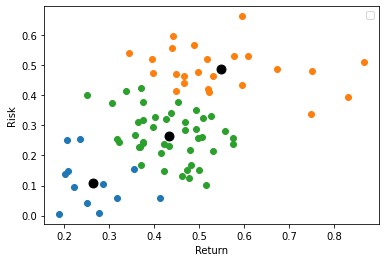

In [101]:
predict = kmeans.labels_
df_simple['class'] = predict
u_labels = np.unique(predict)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(df_simple[df_simple['class']==i]['RETURN'],df_simple[df_simple['class']==i]['RISK'])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.xlabel("Return")
plt.ylabel("Risk")
plt.legend()
plt.show()

In [102]:
df['class'] = df_simple['class']
df.head()

,index,stocks,SMA42,SMA150,RSI,VAR,outlier,class
1,1,"['HGTX3', 'CVCB3', 'ELET6', 'ABEV3', 'ENBR3', ...",0.467806,0.363506,0.676520,0.421233,1,1
2,2,"['LAME4', 'SBSP3', 'TAEE11', 'GOAU4']",0.310407,0.366342,0.386661,0.416246,1,2
4,4,"['TIMS3', 'LREN3', 'GOLL4', 'BBDC4']",0.358413,0.368369,0.356500,0.542556,1,1
5,5,"['KLBN11', 'BBDC4', 'AZUL4', 'PRIO3', 'CSNA3',...",0.427673,0.409185,0.689250,0.332312,1,2
6,6,"['CVCB3', 'ITSA4', 'QUAL3', 'SBSP3', 'LREN3']",0.394594,0.424574,0.498832,0.597154,1,1


In [104]:
df[df['class'] == 0].mean()

/tmp/ipykernel_7746/2333176835.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['class'] == 0].mean()


index      53.333333
SMA42       0.165088
SMA150      0.141263
RSI         0.579272
VAR         0.109797
outlier     1.000000
class       0.000000
dtype: float64

In [105]:
df[df['class'] == 1].mean()

/tmp/ipykernel_7746/2740041638.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['class'] == 1].mean()


index      46.166667
SMA42       0.528430
SMA150      0.536915
RSI         0.514488
VAR         0.488956
outlier     1.000000
class       1.000000
dtype: float64

In [106]:
df[df['class'] == 2].mean()

/tmp/ipykernel_7746/2899474117.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['class'] == 2].mean()


index      46.813953
SMA42       0.355448
SMA150      0.352572
RSI         0.590861
VAR         0.266363
outlier     1.000000
class       2.000000
dtype: float64